# Homework 12 - Amanda Pignataro

Load the `ISLR2` and `tidyverse` packages.

In [3]:
library(ISLR2)
library(tidyverse)
library(tidymodels)

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [4]:
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

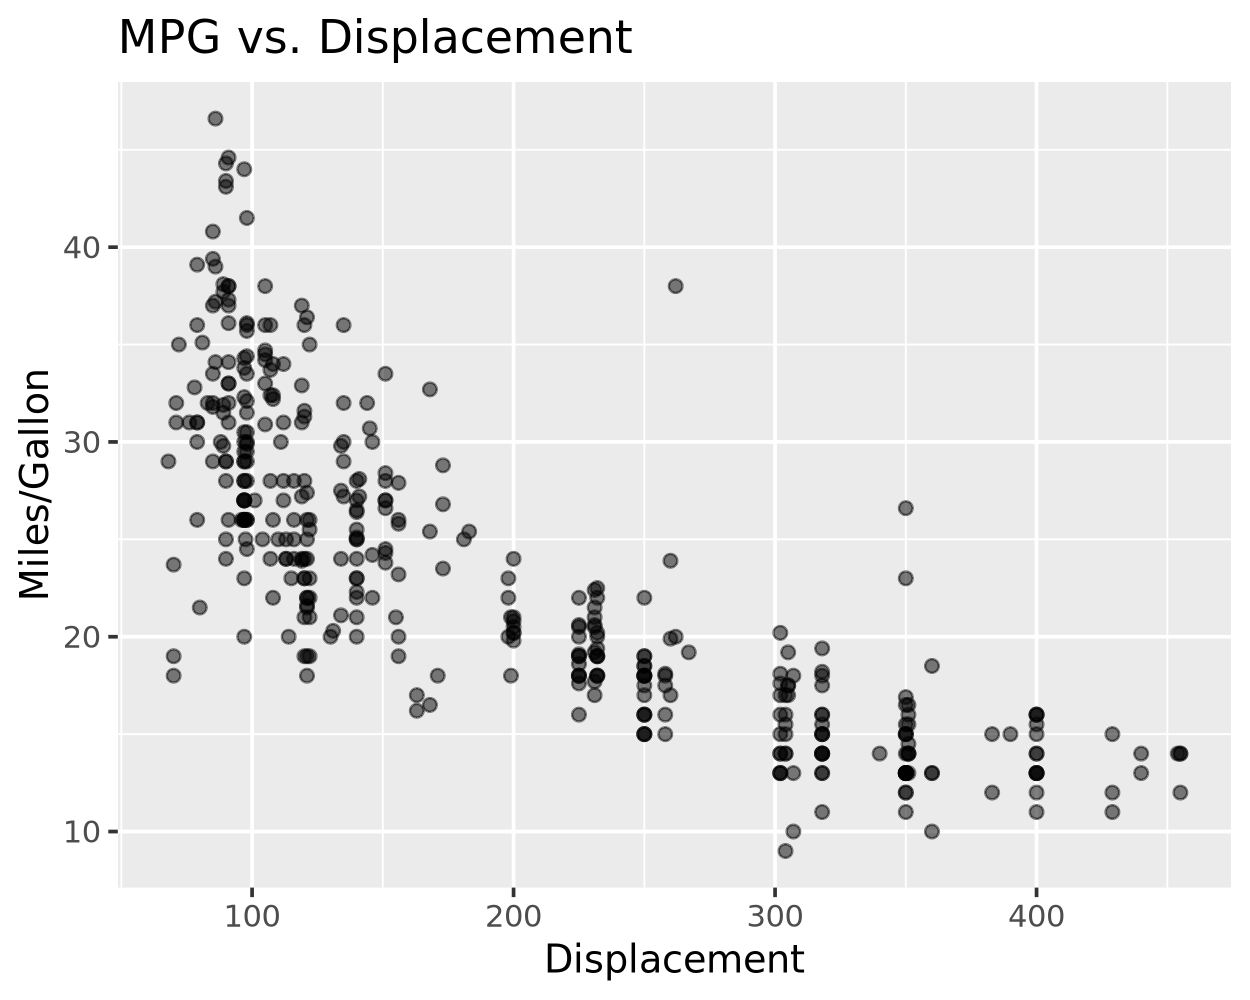

In [14]:
## This will plot mpg as a function of displacement
ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point(alpha = 0.5) +
  labs(title = "MPG vs. Displacement",
       x = "Displacement",
       y = "Miles/Gallon")

❓Does the relationship of `mpg` to `displacement` look linear?

The relationship of mpg to displacement appears to be nonlinear as it is curved and presents a downward trend. Essentially, as displacement increases, we see a decrease in mpg. 


Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [20]:
## This will define the recipe, using a spline transform
## This will convert cylinders to categorical data for the model
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) |>
  step_ns(displacement, deg_free = 4) |>               
  step_mutate(cyl_cat = factor(cylinders)) |>          
  step_dummy(cyl_cat) |>                               
  step_rm(cylinders)     

In [23]:
## This will prep our defined recipe above for fitting the model below
rec <- prep(rec)
auto_trans <- juice(rec)

## This will fit the model
mod_fit <- linear_reg() |>
  set_engine("lm") |>
  fit(mpg ~ ., data = auto_trans)

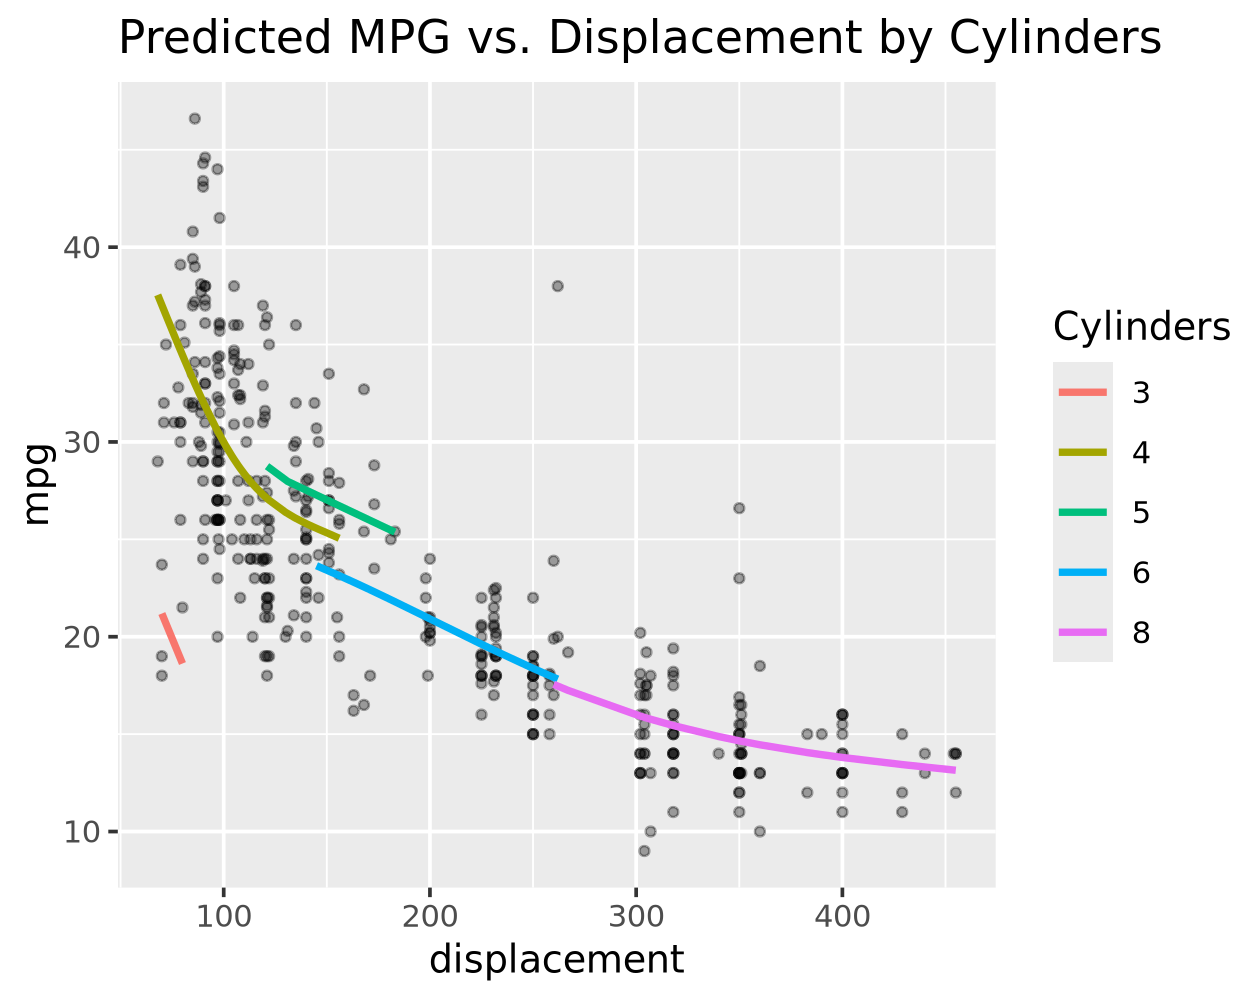

In [24]:
## This will visualize the model predictions and color the lines by the cylinders
predict(mod_fit, auto_trans) |>
  bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
    labs(title = "Predicted MPG vs. Displacement by Cylinders",
         color = "Cylinders")